In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import seaborn as sns
import numpy as np
import operator
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [105]:
data = pd.read_csv('../data/survey_results_public.csv')
data.head(5)

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


### insights

In [106]:
data.describe()

,Respondent,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,...,JobEmailPriorities6,JobEmailPriorities7,ConvertedSalary,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7
count,98855.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,...,46213.00000,46213.000000,4.770200e+04,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000
mean,50822.971635,6.397089,6.673524,5.906875,4.065791,3.953243,4.407196,5.673181,4.225200,7.640009,...,4.97425,4.836388,9.578086e+04,2.726880,3.805784,3.340945,3.782470,4.383604,5.138809,4.821459
std,29321.650410,2.788428,2.531202,2.642734,2.541196,2.520499,2.502069,2.923998,2.507411,2.407457,...,1.86063,1.659844,2.023482e+05,1.881078,1.821323,1.673485,1.844864,1.931746,1.853249,1.874895
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,25443.500000,4.000000,5.000000,4.000000,2.000000,2.000000,2.000000,3.000000,2.000000,6.000000,...,4.00000,4.000000,2.384400e+04,1.000000,2.000000,2.000000,2.000000,3.000000,4.000000,3.000000
50%,50823.000000,7.000000,7.000000,6.000000,4.000000,3.000000,4.000000,6.000000,4.000000,8.000000,...,5.00000,5.000000,5.507500e+04,2.000000,4.000000,3.000000,4.000000,5.000000,6.000000,5.000000
75%,76219.500000,9.000000,9.000000,8.000000,6.000000,6.000000,6.000000,8.000000,6.000000,10.000000,...,7.00000,6.000000,9.300000e+04,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000
max,101592.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,7.00000,7.000000,2.000000e+06,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


### check missing data

In [107]:
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False).astype('int')
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data['Column_Name'] = missing_data.index

missing_data


,Total,Percent,Column_Name
TimeAfterBootcamp,92203,93,TimeAfterBootcamp
MilitaryUS,83074,84,MilitaryUS
HackathonReasons,73164,74,HackathonReasons
ErgonomicDevices,64797,65,ErgonomicDevices
AdBlockerReasons,61110,61,AdBlockerReasons
StackOverflowJobsRecommend,60538,61,StackOverflowJobsRecommend
JobEmailPriorities1,52642,53,JobEmailPriorities1
JobEmailPriorities2,52642,53,JobEmailPriorities2
JobEmailPriorities3,52642,53,JobEmailPriorities3
JobEmailPriorities4,52642,53,JobEmailPriorities4


### cleanup 

In [108]:

data['Student'] = data['Student'].fillna('unknown')
data["Country"] = data["Country"].fillna('unknown')
data["DevType"] = data["DevType"].fillna('unknown')

employment = {
    'Employed full-time': 'full-time',
    'Employed part-time': 'part-time',
    'Independent contractor, freelancer, or self-employed': 'self-employed',
    'Not employed, but looking for work': 'looking',
    'Not employed, and not looking for work': 'not-employed'
}

education = {
    "Professional degree (JD, MD, etc.)": "professional-degree",
    "Associate degree": "associate-degree",
    "Bachelor’s degree (BA, BS, B.Eng., etc.)": "bachelor-degree",
    "Master’s degree (MA, MS, M.Eng., MBA, etc.)": "master-degree",
    "Other doctoral degree (Ph.D, Ed.D., etc.)": "doctoral-degree",
    "Some college/university study without earning a degree": "collage",
    "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)": "secondary-school",
    "Primary/elementary school": "elementary-school",
    "I never completed any formal education": "no-degree",

}

data['Employment'].replace(employment, inplace=True)
data["Employment"].fillna("unknown",inplace=True)

data["FormalEducation"].replace(education, inplace=True)
data["FormalEducation"].fillna("unknown", inplace=True)

data["TimeAfterBootcamp"][data["TimeAfterBootcamp"] == "I already had a full-time job as a developer when I began the program"] = "Already had a job"

data.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,part-time,bachelor-degree,Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,full-time,bachelor-degree,"A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,full-time,associate-degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,full-time,bachelor-degree,"Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",full-time,collage,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [109]:
def clean_view(column: str, mapped_column:str):
    counts = countries_data_df[column].dropna().str.split(';').map(Counter).sum()
    series = pd.Series(counts, name='count')
    series = series.rename_axis([mapped_column])
    counts_df = pd.DataFrame(series)
    counts_df.reset_index(inplace=True)
    counts_df.sort_values(inplace=True, by=['count'], ascending=False)
    return counts_df

### Top 15 countries 

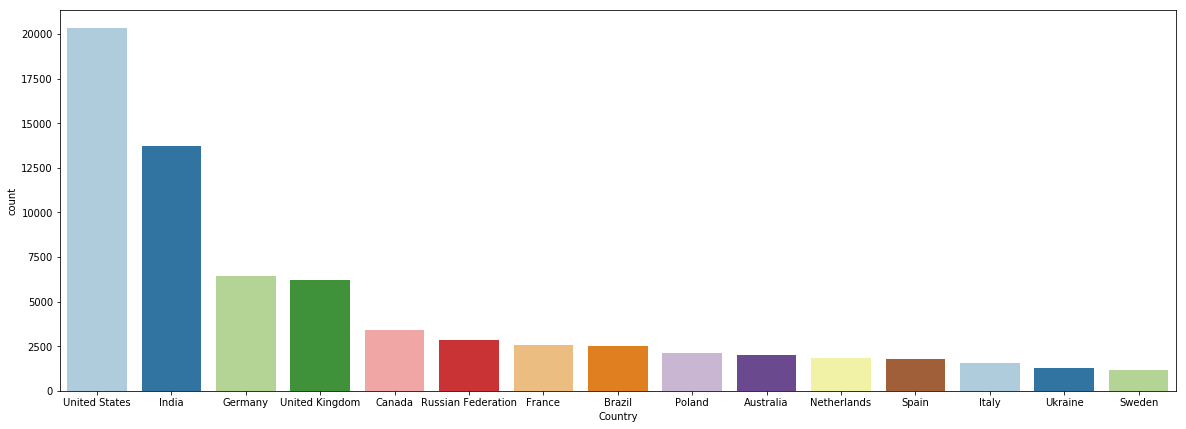

In [110]:
top_countries = data.Country.value_counts()
top_15_countries = top_countries.head(15)

countries = list(top_15_countries.index)

plt.subplots(figsize=(20,7))
sns.countplot(x = data.Country, order = top_15_countries.index, palette='Paired')

In [111]:
#  filter for the top countries
countries_data_df = data[data['Country'].isin(countries)]
countries_data_df.shape

(69777, 129)

### Employment 

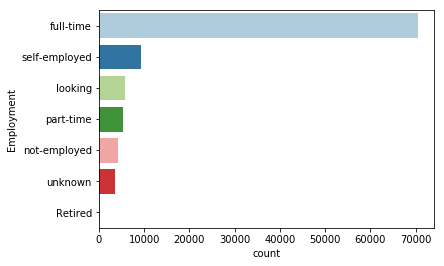

In [112]:
sns.countplot(y=data.Employment, order = countries_data_df.Employment.value_counts().index, palette='Paired')

### Hobbies in terms of Open Source contribution and Employment

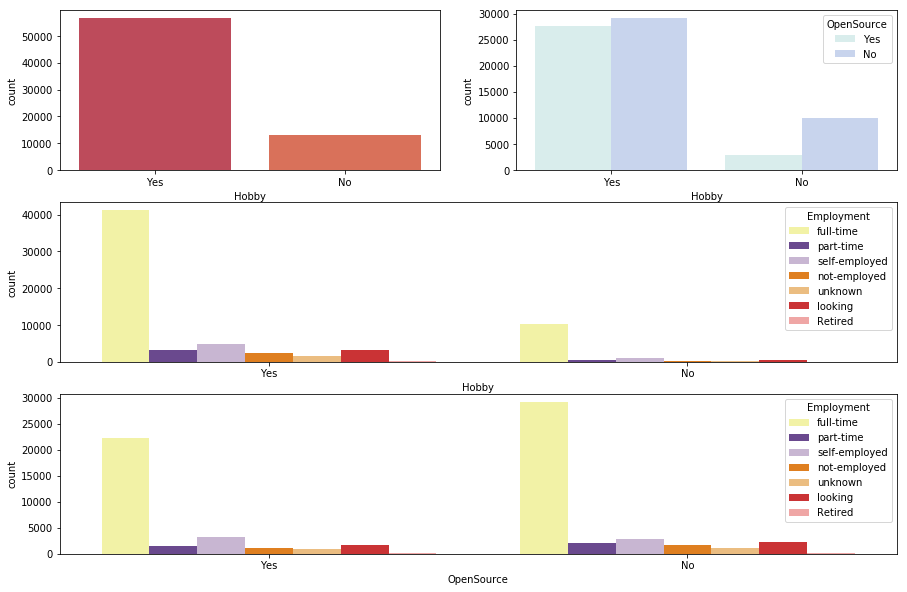

In [113]:
gs = gridspec.GridSpec(3, 2)

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(gs[0, 0]) # row 0, col 0
sns.factorplot("Hobby",data=countries_data_df,kind="count",ax=ax1,palette=sns.color_palette("Spectral", 10))

ax2 = fig.add_subplot(gs[0, 1]) # row 0, col 1
sns.factorplot("Hobby",data=countries_data_df, kind="count",ax=ax2,hue="OpenSource",palette=sns.color_palette("cubehelix_r", 10))

ax3 = fig.add_subplot(gs[1, :]) # row 1, span all columns
sns.factorplot("Hobby",data=countries_data_df,kind="count",ax=ax3,hue="Employment",palette=sns.color_palette("Paired_r", 10))

ax4 = fig.add_subplot(gs[2, :]) # row 2, span all columns
sns.factorplot("OpenSource",data=countries_data_df,kind="count",ax=ax4,hue="Employment",palette=sns.color_palette("Paired_r", 10))

plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)

### Specialties

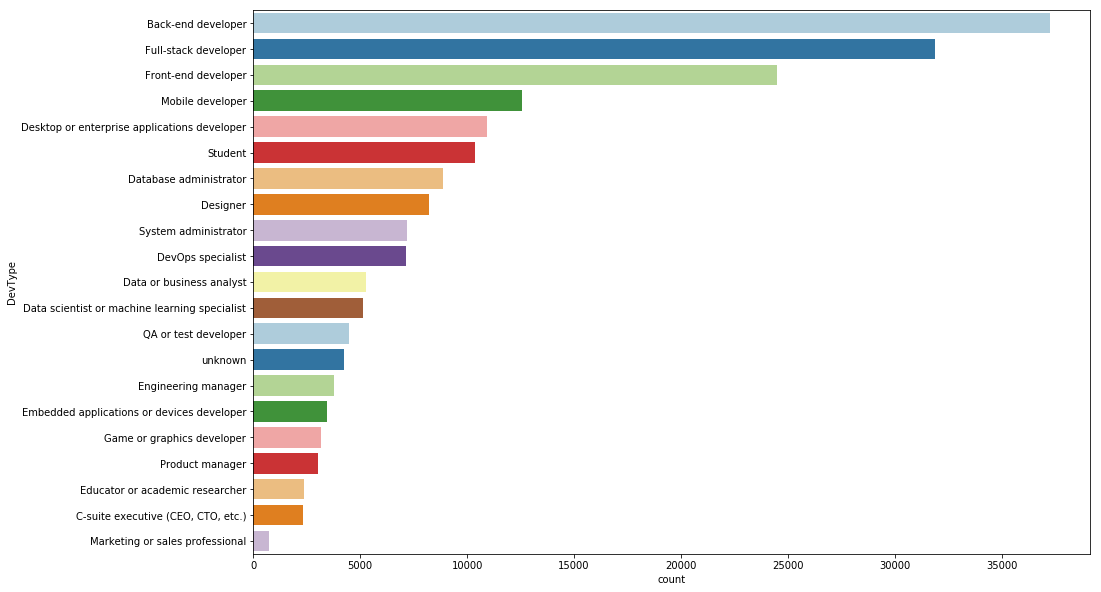

In [114]:
roles_df = clean_view('DevType', 'DevType')
plt.figure(figsize=(15,10))
sns.barplot(x=roles_df['count'], y=roles_df['DevType'], palette='Paired')

### Languages used

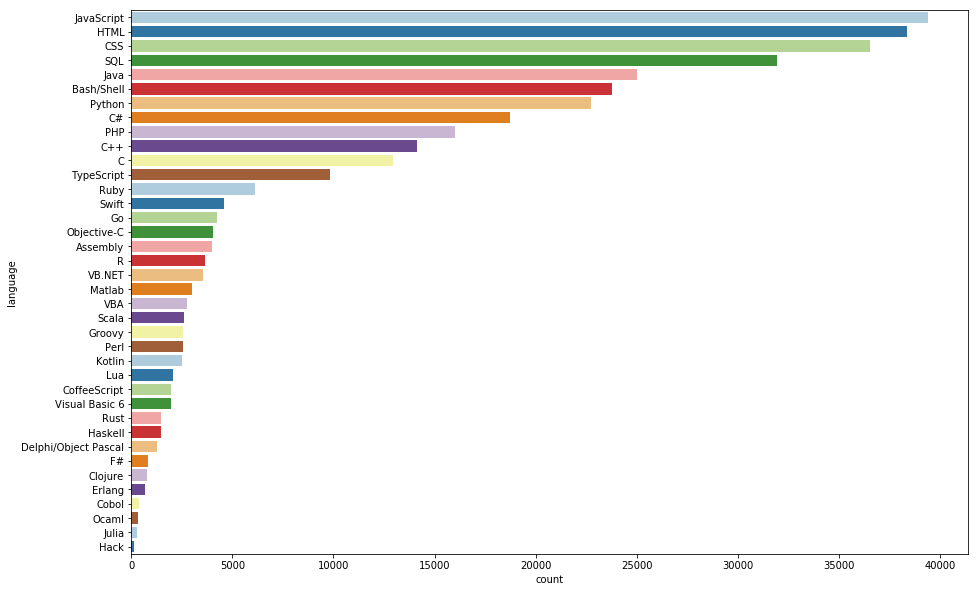

In [115]:
languages_df = clean_view('LanguageWorkedWith', 'language')
plt.figure(figsize=(15,10))
sns.barplot(x=languages_df['count'], y=languages_df['language'], palette='Paired')

### Languages desired to learn

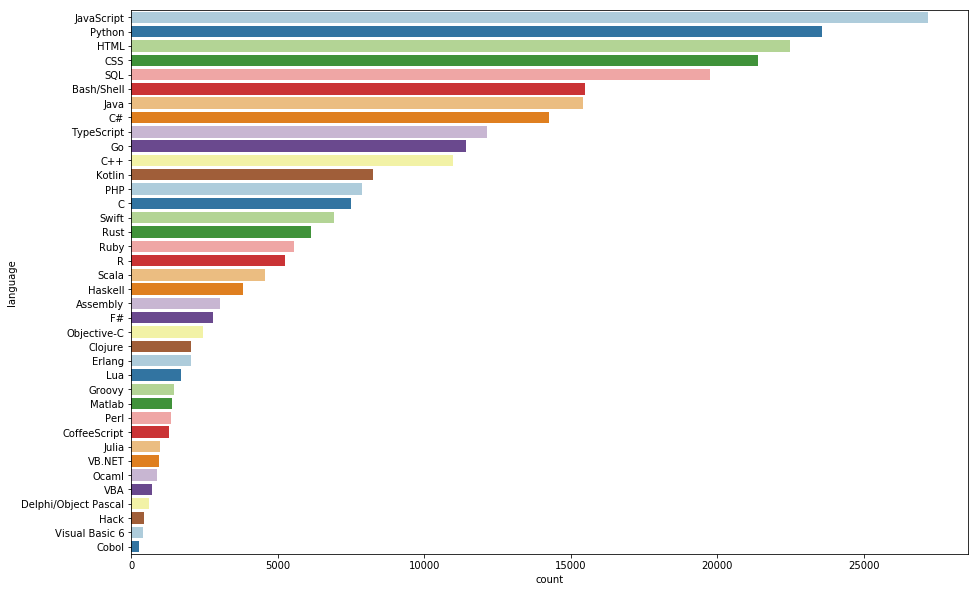

In [116]:
languages_desired_df = clean_view('LanguageDesireNextYear', 'language')
plt.figure(figsize=(15,10))
sns.barplot(x=languages_desired_df['count'], y=languages_desired_df['language'], palette='Paired')

### Most used databases

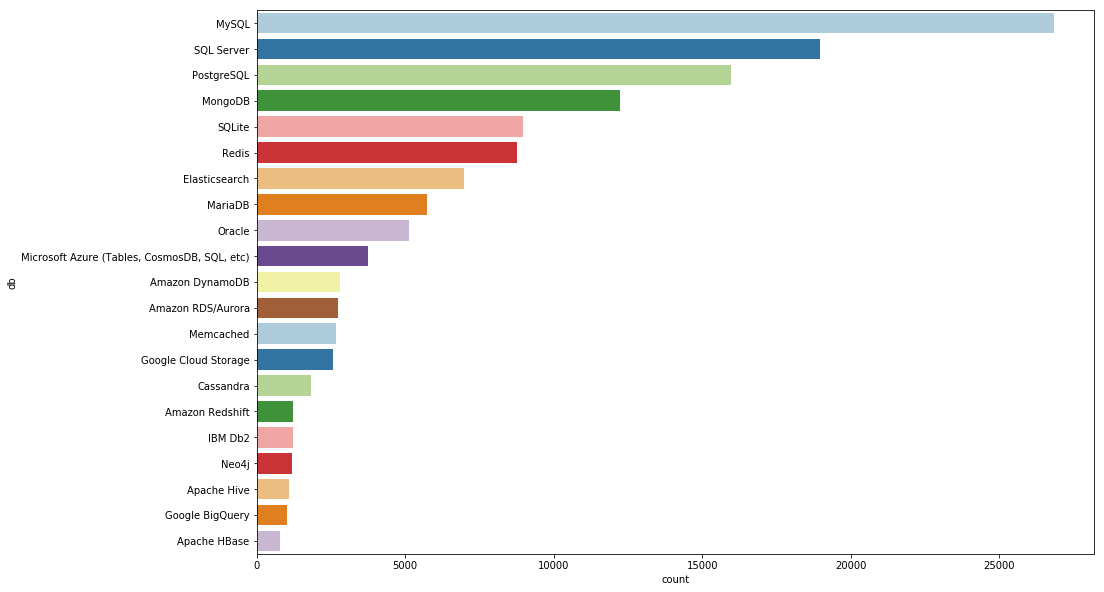

In [117]:
db_df = clean_view('DatabaseWorkedWith', 'db')
plt.figure(figsize=(15,10))
sns.barplot(x=db_df['count'], y=db_df['db'], palette='Paired')

### Databases wish to use

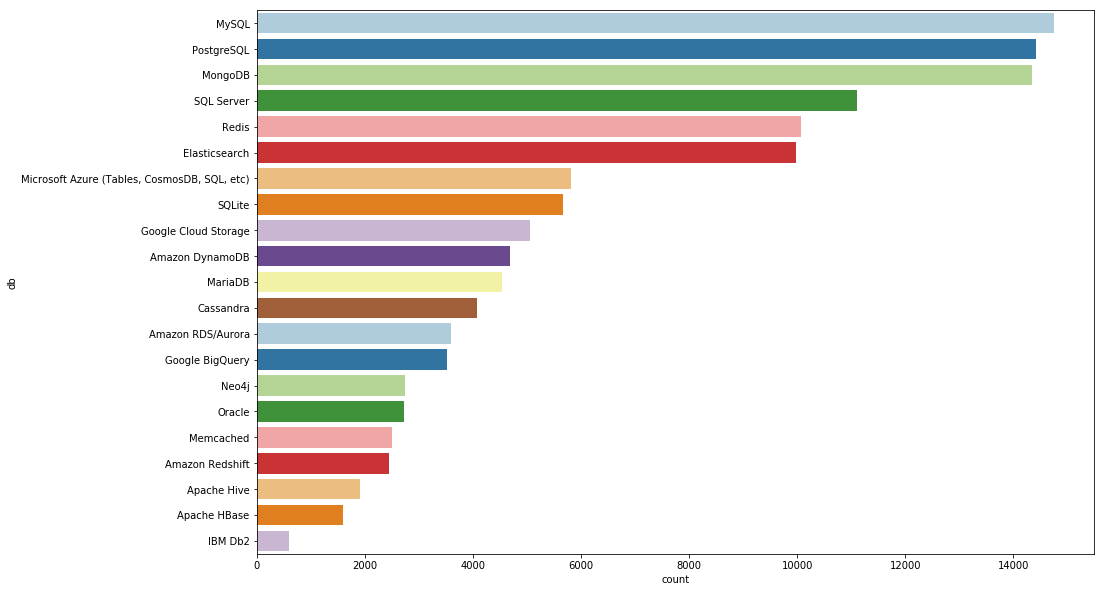

In [118]:
db_desired_df = clean_view('DatabaseDesireNextYear', 'db')
plt.figure(figsize=(15,10))
sns.barplot(x=db_desired_df['count'], y=db_desired_df['db'], palette='Paired')

### Most used frameworks

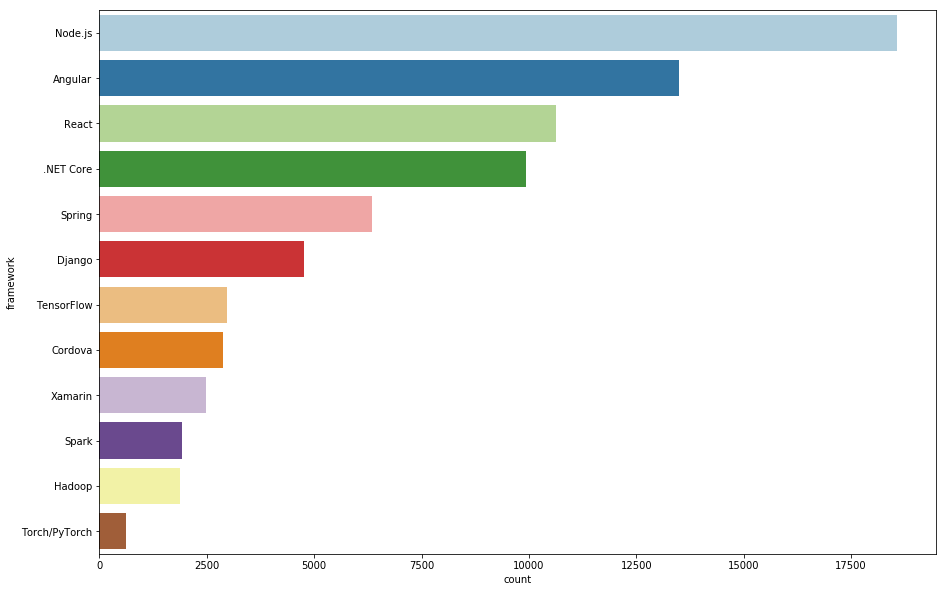

In [119]:
frameworks_df = clean_view('FrameworkWorkedWith', 'framework')
plt.figure(figsize=(15,10))
sns.barplot(x=frameworks_df['count'], y=frameworks_df['framework'], palette='Paired')

### Years of coding

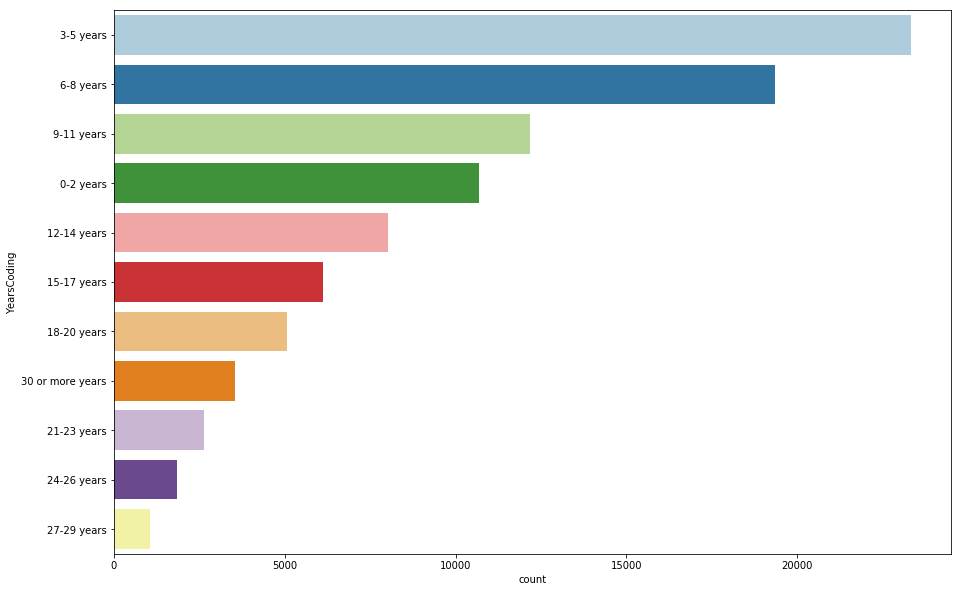

In [120]:
plt.figure(figsize=(15,10))
sns.countplot(y = data.YearsCoding, order = data.YearsCoding.value_counts().index, palette='Paired')

### Satisfaction

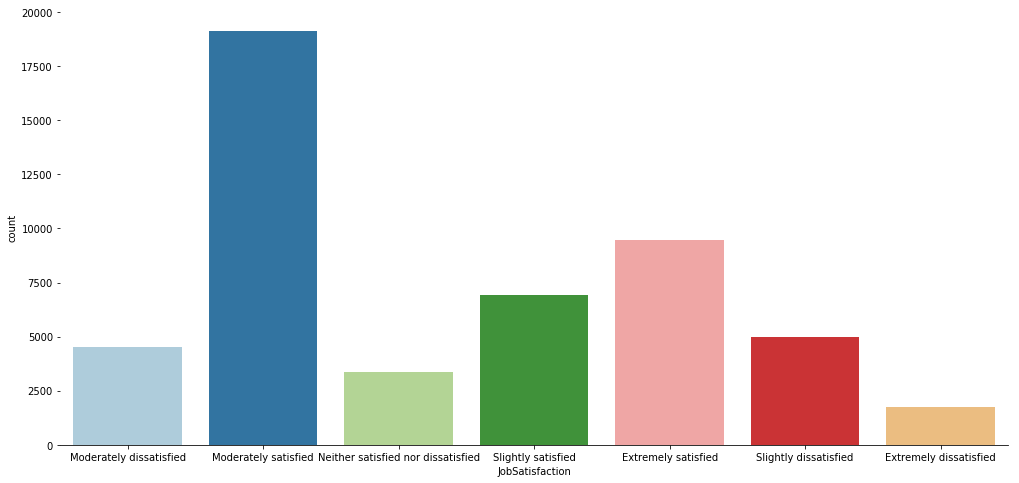

In [121]:
plt.figure(figsize=(17, 8))
sns.countplot(data=countries_data_df, x='JobSatisfaction', palette='Paired')
sns.despine(left=True)

### Satisfaction per country

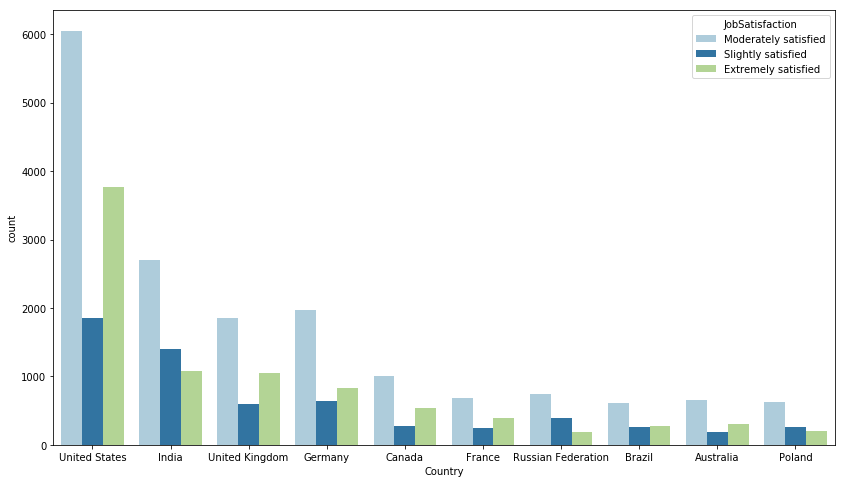

In [122]:

sat = countries_data_df[np.logical_or(np.logical_or(countries_data_df['JobSatisfaction'] == 'Moderately satisfied', countries_data_df['JobSatisfaction'] == 'Extremely satisfied'), countries_data_df['JobSatisfaction'] == 'Slightly satisfied')]

plt.figure(figsize=(14, 8))
sns.countplot(data=sat, x='Country', hue='JobSatisfaction', palette='Paired', order=sat['Country'].value_counts()[:10].index)


### Wake up times

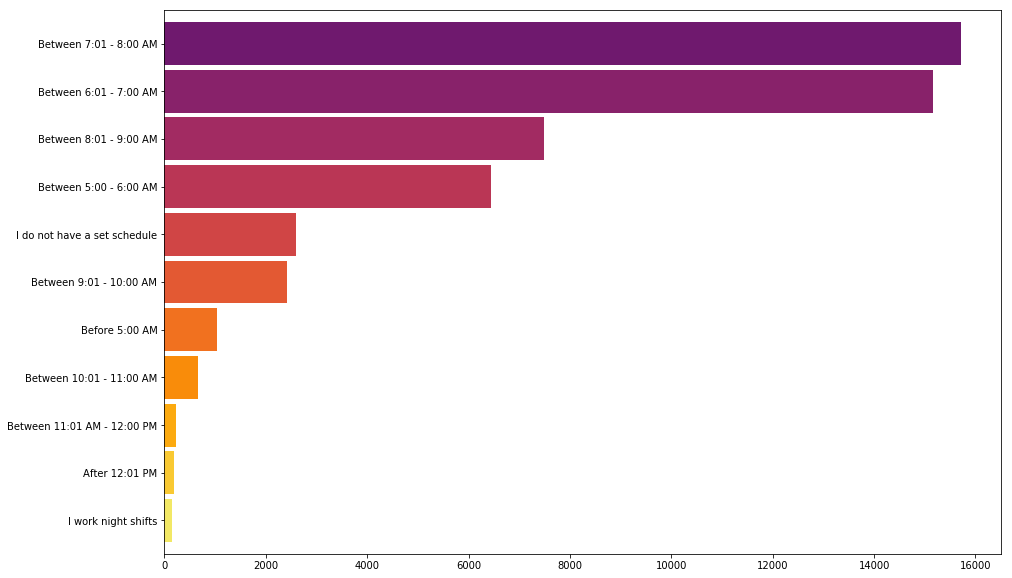

In [123]:
plt.figure(figsize=(15,10))
countries_data_df.WakeTime.value_counts().sort_values(ascending=True).plot.barh(width=0.9, color=sns.color_palette('inferno_r',15))

### wake up times per country

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

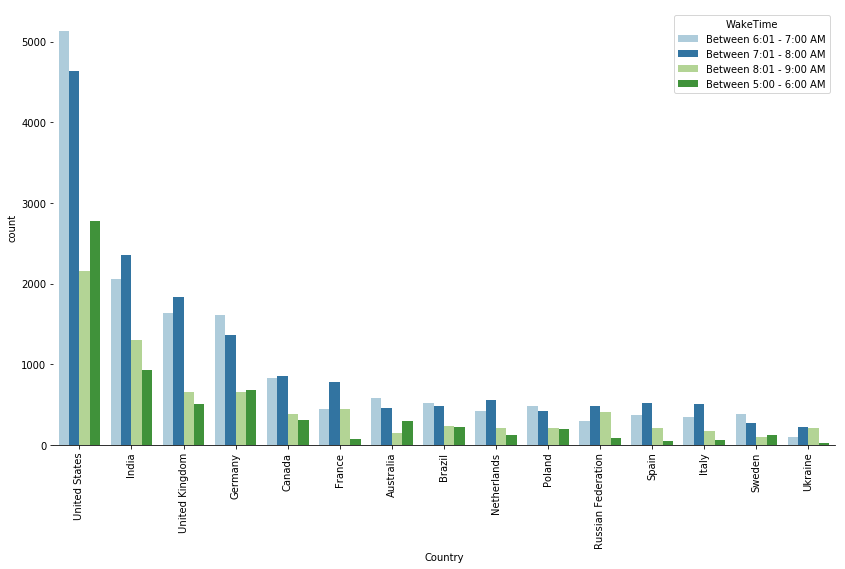

In [124]:
early = countries_data_df[
    np.logical_or(np.logical_or(np.logical_or(
        countries_data_df['WakeTime'] == 'Between 7:01 - 8:00 AM', 
        countries_data_df['WakeTime'] == 'Between 6:01 - 7:00 AM'
    ), countries_data_df['WakeTime'] == 'Between 5:00 - 6:00 AM'),  
       countries_data_df['WakeTime'] == 'Between 8:01 - 9:00 AM')] 

plt.figure(figsize=(14, 8))
sns.countplot(data=early, x='Country', hue='WakeTime', palette='Paired', order=early['Country'].value_counts().index)
sns.despine(left=True)
plt.xticks(rotation='vertical')

### Wake up time vs Satisfaction

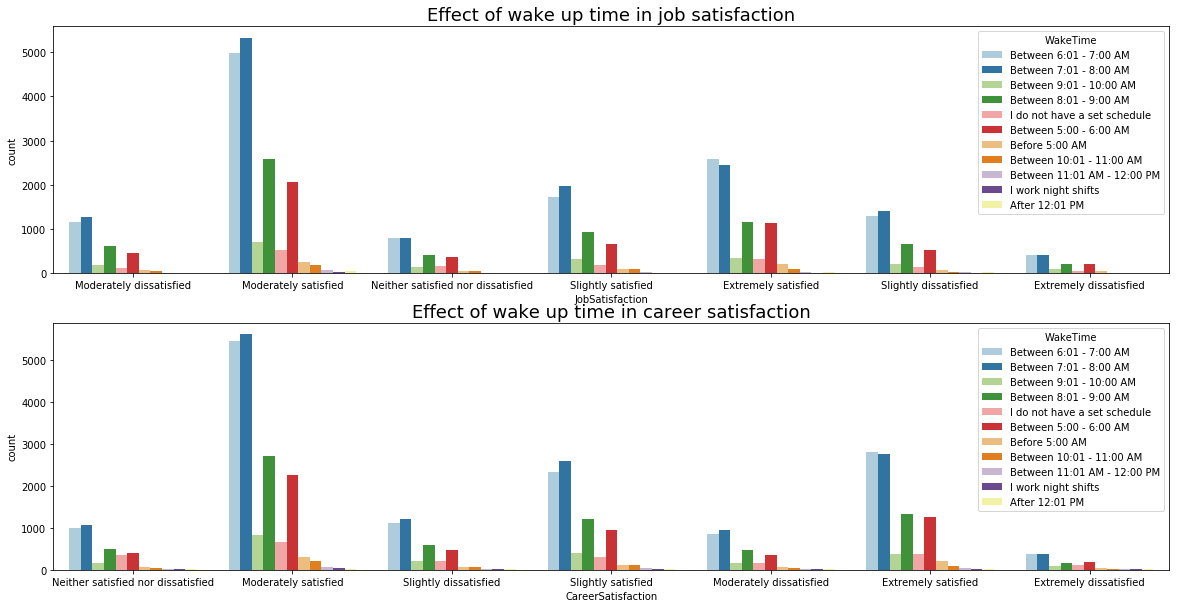

In [125]:
gs = gridspec.GridSpec(2, 1)
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(gs[0:1]) 
sns.factorplot(x="JobSatisfaction", kind="count",hue="WakeTime", data=countries_data_df, ax=ax1, palette='Paired')

ax2 = fig.add_subplot(gs[1:])
sns.factorplot(x='CareerSatisfaction', kind="count", hue='WakeTime', data=countries_data_df, ax=ax2, palette='Paired')

ax1.set_title('Effect of wake up time in job satisfaction', fontsize=18)
ax2.set_title('Effect of wake up time in career satisfaction', fontsize=18)

plt.close(2)
plt.close(3)

### Hours on computer per country

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

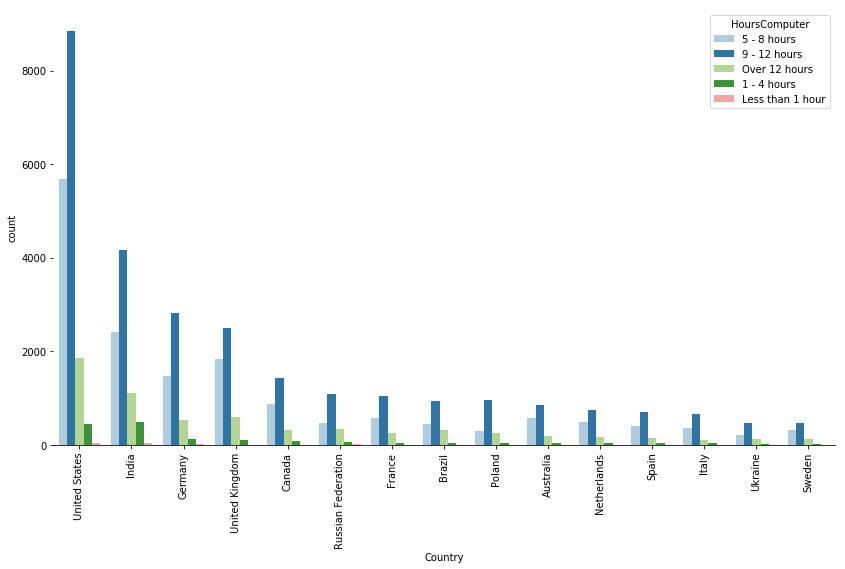

In [126]:
plt.figure(figsize=(14, 8))
sns.countplot(data=countries_data_df, x='Country', hue='HoursComputer', palette='Paired', order=countries_data_df['Country'].value_counts().index)
sns.despine(left=True)
plt.xticks(rotation='vertical')

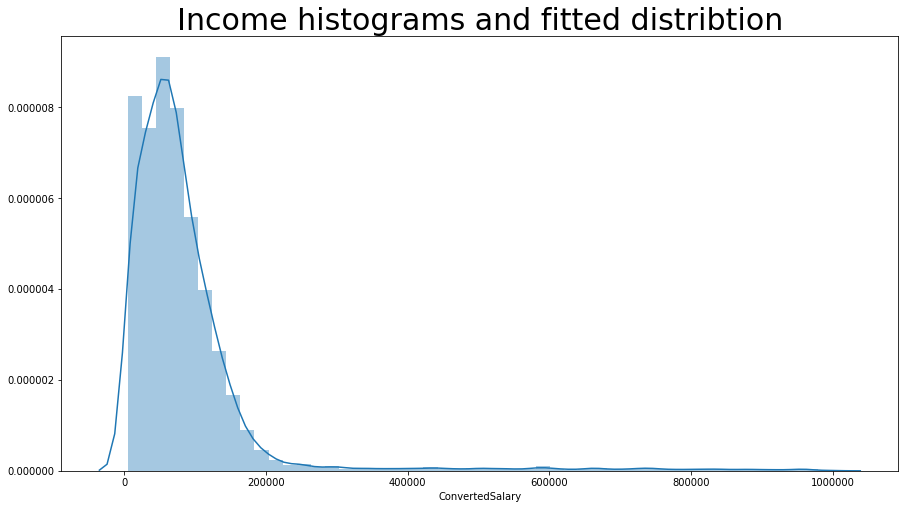

In [127]:
sal_dist = countries_data_df[(countries_data_df['ConvertedSalary']>5000) & (data['ConvertedSalary']<1000000)]

plt.subplots(figsize=(15,8))
sns.distplot(sal_dist['ConvertedSalary'])
plt.title('Income histograms and fitted distribtion',size=30)
plt.show();

In [128]:
print('The median salary of developers: {} USD'.format(sal_dist['ConvertedSalary'].median()))
print('The mean salary of developers: {:0.2f} USD'.format(sal_dist['ConvertedSalary'].mean()))

The median salary of developers: 65000.0 USD
The mean salary of developers: 86658.11 USD


### Male vs Female

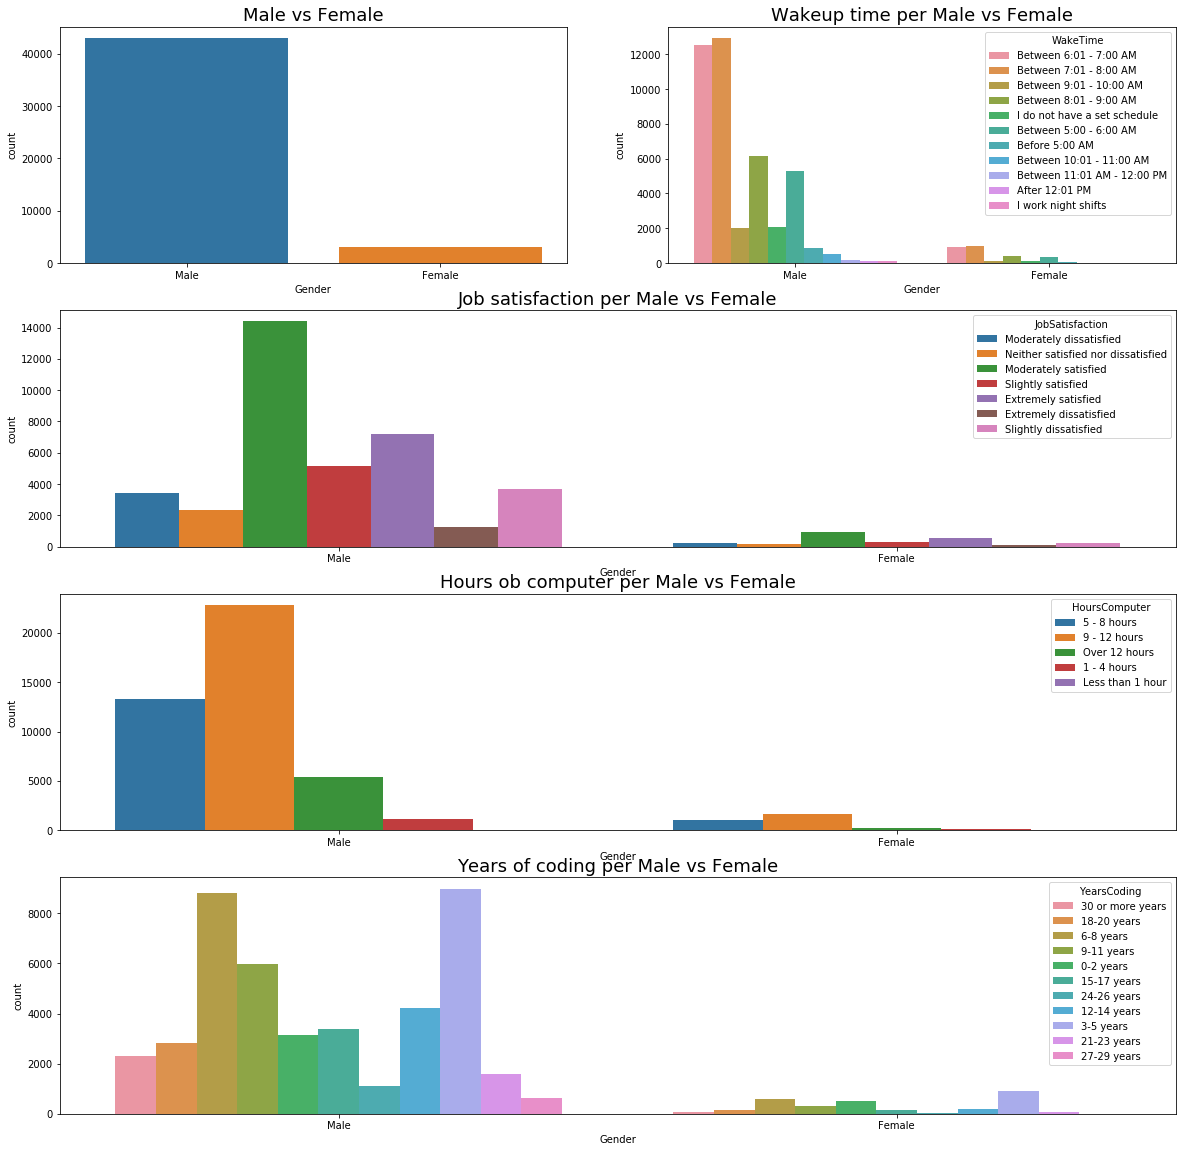

In [129]:
gender_filter=countries_data_df[countries_data_df.Gender.isin(['Male','Female'])]

gs = gridspec.GridSpec(4, 2)
fig = plt.figure(figsize=(20,20))

ax1 = fig.add_subplot(gs[0,0]) 
sns.factorplot(x="Gender", kind="count", data=gender_filter, ax=ax1)

ax2 = fig.add_subplot(gs[0,1])
sns.factorplot(x='Gender', kind="count", hue='WakeTime', data=gender_filter, ax=ax2)

ax3 = fig.add_subplot(gs[1,:])
sns.factorplot(x='Gender', kind="count", hue='JobSatisfaction', data=gender_filter, ax=ax3)

ax4 = fig.add_subplot(gs[2,:])
sns.factorplot( x='Gender', kind="count", hue='HoursComputer', data=gender_filter, ax=ax4)

ax5 = fig.add_subplot(gs[3,:])
sns.factorplot(x='Gender',  kind="count",  hue='YearsCoding', data=gender_filter, ax=ax5)

ax1.set_title('Male vs Female', fontsize=18)
ax2.set_title('Wakeup time per Male vs Female', fontsize=18)
ax3.set_title('Job satisfaction per Male vs Female', fontsize=18)
ax4.set_title('Hours ob computer per Male vs Female', fontsize=18)
ax5.set_title('Years of coding per Male vs Female', fontsize=18)

plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.close(6)